# Kernel Principal Component Analysis (KPCA)

In [1]:
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import numpy as np

### Custom Kernel PCA

In [2]:
def rbf_kernel_pca(X, gamma, n_components):

    sq_dists = pdist(X, 'sqeuclidean')

    mat_sq_dists = squareform(sq_dists)

    K = np.exp(-gamma * mat_sq_dists)

    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    eigvals, eigvecs = eigh(K)
    
    eigen_vectors = [eigvecs[:, -i] for i in range(1, n_components + 1)]

    X_pc = np.column_stack(eigen_vectors)

    return X_pc

### Example 1 - Separating Half Moons

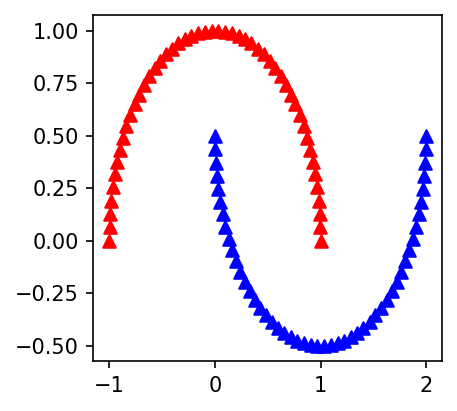

In [3]:
X, y = make_moons(n_samples = 100, random_state = 123)

plt.figure(figsize = [3, 3], dpi = 150)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = '^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'b', marker = '^')
plt.show()

#### 1.1 Apply Standard PCA

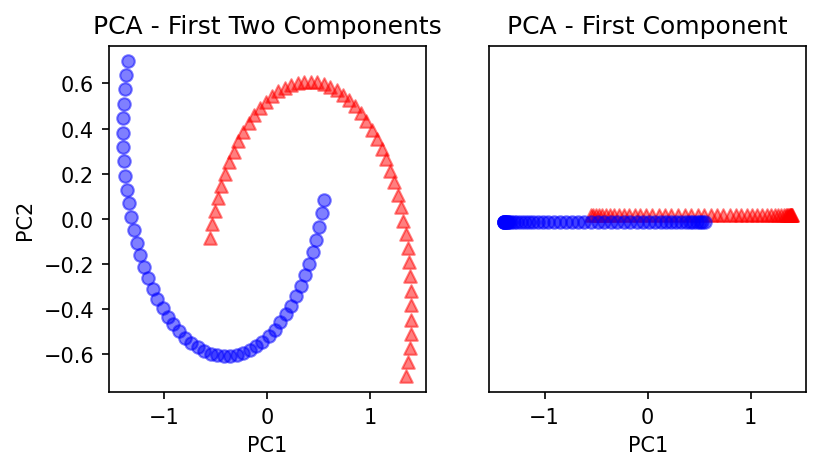

In [4]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6,3), dpi = 150)

ax[0].scatter(x_pca[y == 0, 0], x_pca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(x_pca[y == 1, 0], x_pca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(x_pca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(x_pca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[0].set_title('PCA - First Two Components')
ax[1].set_title('PCA - First Component')
plt.show()

#### 1.2 Apply Kernel PCA

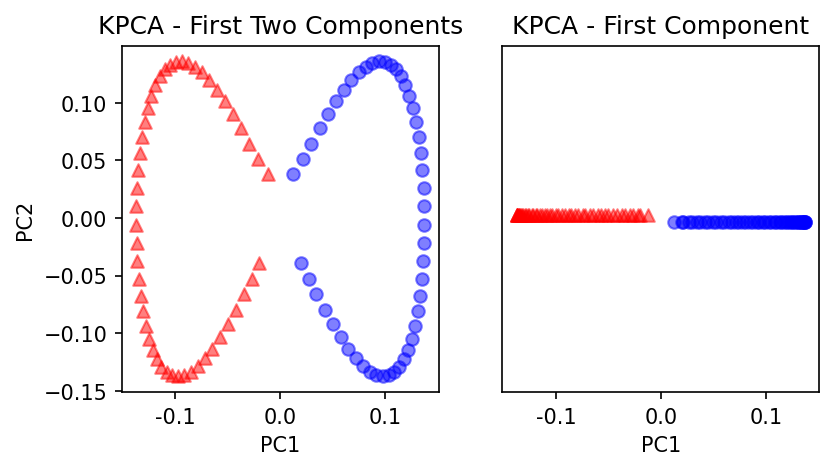

In [5]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3), dpi = 150)

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[0].set_title('KPCA - First Two Components')
ax[1].set_title('KPCA - First Component')
plt.show()

### Example 2: Separating Concentric Circles



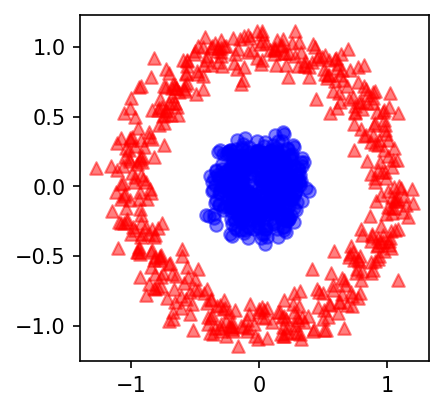

In [6]:
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)

plt.figure(figsize=[3, 3], dpi = 150)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '^', c = 'r', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'o', c = 'b', alpha = 0.5)
plt.show()

#### 2.1 Apply Standard PCA

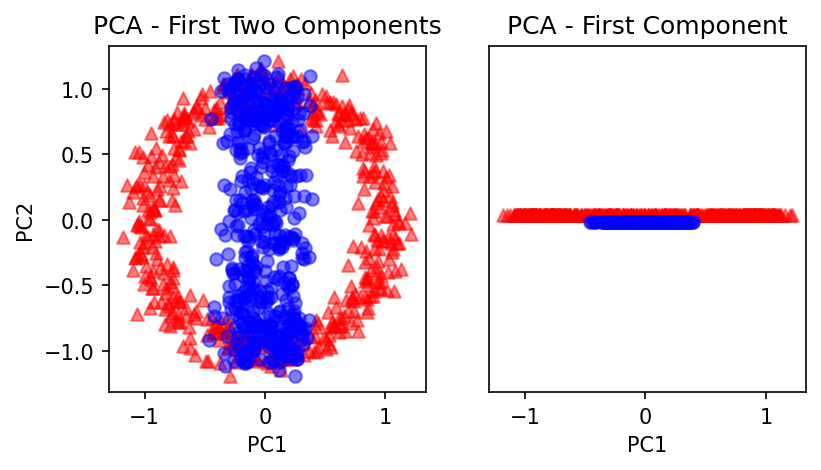

In [7]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

fig,ax= plt.subplots(nrows = 1,ncols = 2, figsize = (6, 3), dpi = 150)

ax[0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c = 'r', marker = '^', alpha = 0.5)
ax[0].scatter(X_pca[y == 1, 0], X_pca[y == 0, 1], c = 'b', marker = 'o', alpha = 0.5)
ax[1].scatter(X_pca[y == 0, 0], np.zeros((500, 1)) + 0.02, c = 'r', marker = '^', alpha = 0.5)
ax[1].scatter(X_pca[y == 1, 0], np.zeros((500, 1)) - 0.02, c = 'b', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].set_title('PCA - First Two Components')
ax[1].set_title('PCA - First Component')
plt.show()

#### 2.2 Apply Kernel PCA

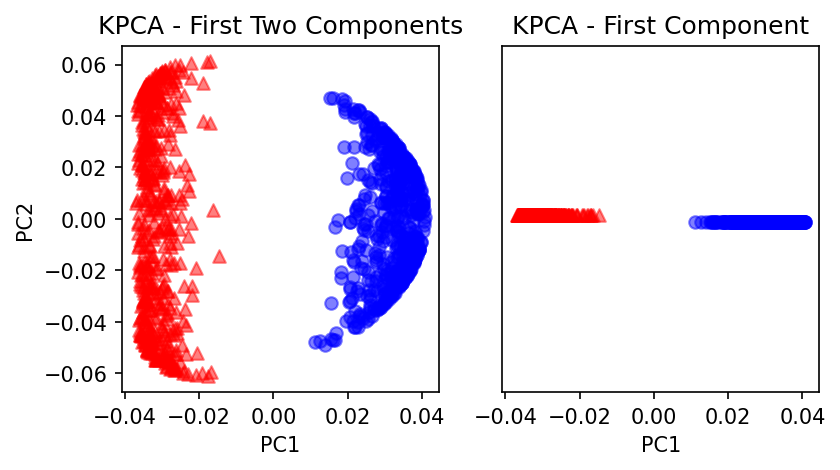

In [8]:
X_kpca = rbf_kernel_pca(X, gamma = 2, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(6, 3), dpi = 150)

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].set_title('KPCA - First Two Components')
ax[1].set_title('KPCA - First Component')
plt.show()